### EX. 1. PART 3

** AUTHORS: Jorge Aranda & Álvaro Cebrián **

<p><span style="color:green">We explain step-by-step code by using common python comments </span></p>

In [1]:
# Importing common libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# Storing breast cancer dataset into the b_cancer variable
b_cancer = load_breast_cancer()

In [3]:
# Establishing our attributes and classes for X and Y
X = b_cancer.data
Y = b_cancer.target

In [96]:
X

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [4]:
### Part 1: Spliting the dataset. Defining a training and a testing subsets.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Values means: we are splitting the 30% of the dataset into 100 aleatory parts, but homogeneously (stratified)
mi_sss = StratifiedShuffleSplit(20, 0.3) 

In [7]:
fallos = [] # We are declaring an empty list that will be filled in the "for-loop".
index = 0 # We put index to 0 because we will use it as a counter in the "for-loop"
test_accuracy = []
train_accuracy = []

#We establish the train set and the test set using the SSS function declared above from the original dataset by using a for loop:
for train_index, test_index in mi_sss.split(X,Y): 
    Xtrain = X[train_index,:]
    Xtest = X[test_index,:]
    Ytrain = Y[train_index]
    Ytest = Y[test_index]
    miKvecinos = KNeighborsClassifier(n_neighbors=5) 
    miKvecinos.fit(Xtrain,Ytrain) 
    Ypred = miKvecinos.predict(Xtest)
    fallos.append(sum(Ypred!=Ytest))
    index = index + 1
    train_accuracy.append(miKvecinos.score(Xtrain, Ytrain))
    test_accuracy.append(miKvecinos.score(Xtest, Ytest))


In [8]:
print("Num. medio de errores de: " + str(100*np.mean(fallos)/len(Ytest)))
print("Dev. Std. de errores de: " + str(100*np.std(fallos)/len(Ytest)))
print("Accuracy for a single KNN with k=5: " + str(miKvecinos))

Num. medio de errores de: 7.22222222222
Dev. Std. de errores de: 1.32420957593
Accuracy for a single KNN with k=5: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [9]:
### Part 2: Cross Validation to know how "miKvecinos" will generalize with X and Y data. 

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
miKvecinos = KNeighborsClassifier(n_neighbors=3)

In [12]:
micvs = cross_val_score(miKvecinos,X,Y,cv=10)

In [13]:
print("Mean accuracy: " + str(np.mean(micvs)))
print("Std: " + str(np.std(micvs)))

Mean accuracy: 0.926333074064
Std: 0.0295872385205


In [14]:
### Part 3: GridSearchCV for miKvecinos

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
miKvecinos = KNeighborsClassifier()

In [17]:
mi_param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance']}

In [18]:
# Implements a “fit” and a “score” method. The best estimator is kept for ensure dataset is well trained. 
migscv = GridSearchCV(miKvecinos,mi_param_grid,cv=10,verbose=2)

In [19]:
# Comparing results we can know if the model is overfiting or underfiting
migscv.fit(X,Y) 

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [20]:
miMejorKvecinos = migscv.best_estimator_

In [21]:
miMejorKvecinos.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [22]:
### Part 4: PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
miPCA = PCA(n_components = 2)

In [25]:
#It shows the original dataset. We use .fit, but we need to transform it to be able to work with it.
X_PCA = miPCA.fit_transform(X) 

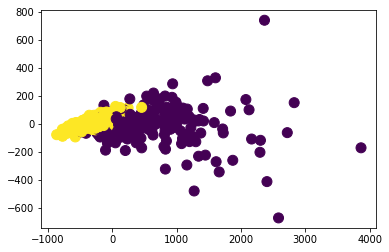

In [26]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], s=100, c=Y)
plt.show()

In [27]:
### Part 5: Naives Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
miGNB = GaussianNB()

In [30]:
micvs = cross_val_score(miGNB,X,Y,cv=10)

In [31]:
print("Mean: " + str(np.mean(micvs)))
print("Std: " + str(np.std(micvs)))

Mean: 0.938679673321
Std: 0.0301128874837


In [32]:
### Part 6: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
miDT = DecisionTreeClassifier()

In [35]:
micvs = cross_val_score(miDT,X,Y,cv=10)

In [36]:
print("Mean: " + str(np.mean(micvs)))
print("Std: " + str(np.std(micvs)))

Mean: 0.908789214415
Std: 0.0238374526481


In [37]:
### Part 7: Decision Tree 2

In [38]:
miPCA = PCA(n_components = 2)

In [39]:
X_PCA = miPCA.fit_transform(X)

In [40]:
miDT = DecisionTreeClassifier()

In [41]:
miDT.fit(X_PCA,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [43]:
Z = miDT.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [44]:
Z = Z.reshape(xx1.shape)

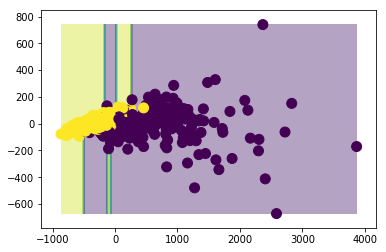

In [45]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
# plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

In [46]:
### Part 8: KNN usando PCA

In [47]:
miPCA = PCA(n_components = 2)

In [48]:
X_PCA = miPCA.fit_transform(X)

In [49]:
miKNN = KNeighborsClassifier(n_neighbors = 1)

In [50]:
miKNN.fit(X_PCA,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [52]:
Z = miKNN.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [53]:
Z = Z.reshape(xx1.shape)

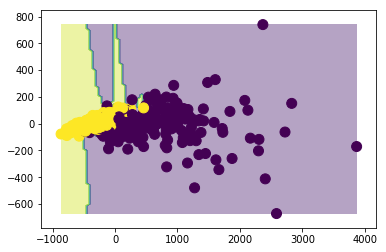

In [54]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
# plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

In [55]:
### Part 9: Neural Network usando PCA

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
miPCA = PCA(n_components = 2)

In [58]:
X_PCA = miPCA.fit_transform(X)

In [59]:
miMLP = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=1000)

In [60]:
miMLP.fit(X_PCA,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [62]:
Z = miMLP.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [63]:
Z = Z.reshape(xx1.shape)

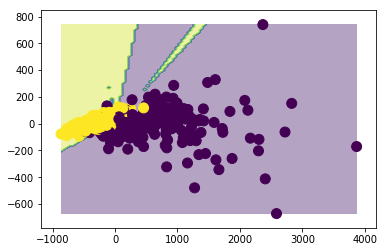

In [64]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
# plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()


In [65]:
### Part 10: SVC usando PCA

In [66]:
from sklearn.svm import SVC

In [67]:
miPCA = PCA(n_components = 2)

In [68]:
X_PCA = miPCA.fit_transform(X)

In [69]:
miSVC = SVC(C=10000,gamma=100,kernel='rbf')

In [70]:
miSVC.fit(X_PCA,Y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [72]:
Z = miSVC.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [73]:
Z = Z.reshape(xx1.shape)

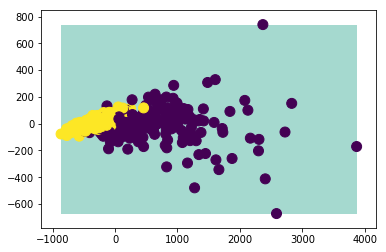

In [74]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

In [75]:
### Part 11: Random Forest usando PCA

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
miPCA = PCA(n_components = 2)

In [78]:
X_PCA = miPCA.fit_transform(X)

In [79]:
miRF = RandomForestClassifier(n_estimators=10,max_depth=3)

In [80]:
miRF.fit(X_PCA,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [82]:
Z = miRF.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [83]:
Z = Z.reshape(xx1.shape)

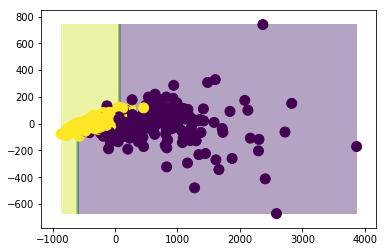

In [84]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
#plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()

In [85]:
### Part 12: Boosting

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
miPCA = PCA(n_components = 2)

In [88]:
X_PCA = miPCA.fit_transform(X)

In [89]:
miADB = AdaBoostClassifier(n_estimators=50)

In [90]:
miADB.fit(X_PCA,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [91]:
xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

In [92]:
Z = miADB.predict(np.c_[xx1.ravel(), xx2.ravel()])

In [93]:
Z = Z.reshape(xx1.shape)

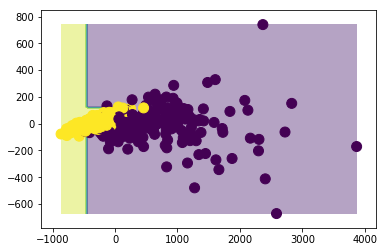

In [94]:
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_PCA[:,0],X_PCA[:,1],s=100,c=Y)
# plt.scatter(xx1,xx2,s=50,c=Z)
plt.axis('tight')
plt.show()